# Подключаем все используемые библиотеки

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Считываем файлы

In [3]:
train = pd.read_csv("./data/features.csv", index_col="match_id")
test = pd.read_csv('./data/features_test.csv', index_col='match_id')

# Рассмотрим данные

In [4]:
train.shape

(97230, 108)

In [5]:
train.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63


In [6]:
description = train.describe()
description

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
count,9.723000e+04,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,...,97230.000000,97230.000000,97230.000000,95404.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000
mean,1.444232e+09,2.630999,51.517104,3.442672,1233.405801,1147.899702,11.231996,0.357009,0.362285,8.271315,...,3.349553,2.448339,0.689119,-6.901922,2332.247886,0.518503,1309.227790,1286.310820,40.599095,41.337036
std,5.515393e+06,2.835761,32.564211,1.111741,566.588895,464.111662,9.041620,0.663889,0.626704,2.497575,...,1.155609,0.813459,0.710122,40.701397,715.806850,0.499660,853.921365,851.009148,27.871645,27.064873
min,1.430199e+09,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-84.000000,900.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.440815e+09,1.000000,22.000000,3.000000,767.000000,746.000000,2.000000,0.000000,0.000000,7.000000,...,3.000000,2.000000,0.000000,-31.000000,1818.000000,0.000000,36.000000,256.000000,3.000000,3.000000
50%,1.446338e+09,1.000000,50.000000,3.000000,1175.000000,1113.000000,11.000000,0.000000,0.000000,8.000000,...,3.000000,2.000000,1.000000,-16.000000,2268.000000,1.000000,1824.000000,1798.000000,63.000000,60.000000
75%,1.448829e+09,7.000000,75.000000,4.000000,1704.000000,1479.000000,19.000000,1.000000,1.000000,10.000000,...,4.000000,3.000000,1.000000,8.000000,2778.000000,1.000000,1974.000000,1974.000000,63.000000,63.000000
max,1.450313e+09,7.000000,112.000000,6.000000,3319.000000,4332.000000,47.000000,8.000000,5.000000,34.000000,...,9.000000,9.000000,13.000000,300.000000,8452.000000,1.000000,2047.000000,2047.000000,63.000000,63.000000


In [7]:
a = description.T['count']/len(train) 
a[a < 1]

first_blood_time               0.798900
first_blood_team               0.798900
first_blood_player1            0.798900
first_blood_player2            0.547598
radiant_bottle_time            0.838620
radiant_courier_time           0.992883
radiant_flying_courier_time    0.717381
radiant_first_ward_time        0.981117
dire_bottle_time               0.833971
dire_courier_time              0.993047
dire_flying_courier_time       0.731585
dire_first_ward_time           0.981220
Name: count, dtype: float64

Все пропуски легко объяснимы тем, что в первые 5 минут игры не всегда происходят события, выбранные в качестве признаков.

# Удаляем признаки, связанные с итогами матча и сохраняем целевую переменную

In [369]:
y_train = train['radiant_win']
answers =['duration', 'tower_status_radiant', 'radiant_win',
          'tower_status_dire', 'barracks_status_radiant', 'barracks_status_dire']
train.drop(answers, axis=1, inplace=True)

# Формируем  "мешок слов" по героям для обучающей и тестовой выборок

In [370]:
heroes = pd.read_csv('./data/dictionaries/heroes.csv')
train_copy = train
X_pick = np.zeros((train_copy.shape[0], len(heroes)))
for i, match_id in enumerate(train_copy.index):
    for p in range(5):
        X_pick[i, train_copy.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, train_copy.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1

heroes_bag_train = pd.DataFrame(X_pick, index=train_copy.index)
heroes_bag_train.head()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
match_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [371]:
heroes = pd.read_csv('./data/dictionaries/heroes.csv')
test_copy = test
X_pick = np.zeros((test_copy.shape[0], len(heroes)))
for i, match_id in enumerate(test_copy.index):
    for p in range(5):
        X_pick[i, test_copy.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, test_copy.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1

heroes_bag_test = pd.DataFrame(X_pick, index=test_copy.index)
heroes_bag_test.head()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
match_id,,,,,,,,,,,,,,,,,,,,,
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
16,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Удаляем некорректные признаки и заполняем пропущенные значения

In [372]:
del train['lobby_type']   
del test['lobby_type']

for n in range(1, 6):
    del train['r{}_hero'.format(n)]
    del train['d{}_hero'.format(n)]
    del test['r{}_hero'.format(n)]
    del test['d{}_hero'.format(n)]

my_imputer = SimpleImputer()
train = pd.DataFrame(my_imputer.fit_transform(train), index = train.index)
test = pd.DataFrame(my_imputer.transform(test), index = test.index)

# Строим модель градиентного бустинга

In [373]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [376]:
scores = []
nums = [10, 20, 30, 50, 100, 250]
for n in nums:
    print('#', str(n))
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    start_time = datetime.datetime.now()
    model_scores = cross_val_score(model, train,  y_train, cv=kf, scoring='roc_auc', n_jobs=-1)
    print('Time elapsed:', datetime.datetime.now() - start_time)
    print(model_scores)
    scores.append(np.mean(model_scores))

# 10
Time elapsed: 0:00:11.745060
[0.6628393  0.66916194 0.65778594 0.66141503 0.66504144]
# 20
Time elapsed: 0:00:21.391225
[0.6809074  0.68238377 0.67803313 0.68128638 0.68453627]
# 30
Time elapsed: 0:00:30.177214
[0.68679836 0.68898548 0.68466605 0.68957589 0.69272758]
# 50
Time elapsed: 0:00:49.371308
[0.69546386 0.69721108 0.69344154 0.69807943 0.70016849]
# 100
Time elapsed: 0:01:35.499023
[0.70394386 0.70631472 0.70312219 0.70720286 0.7092765 ]
# 250
Time elapsed: 0:04:03.475067
[0.71109276 0.71286471 0.7118085  0.71465119 0.715674  ]


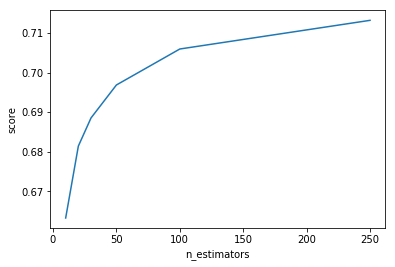

In [377]:
plt.plot(nums, scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

Кросс-валидация для градиентного бустинга с 30 деревьями заняла 0:00:30.18. Показатель метрики качества AUC-ROC в таком случае равен приблизительно 0.69.При увеличение количества деревьев также увеличивается показатель метрики AUC-ROC, приближаясь к 0.72. Для ускорения обучения можно использовать не всю выборку, а некоторое ее подмножество — например, половину объектов. Также можно уменьшить глубину деревьев (max_depth).

# Подбираем оптимальный параметр регуляризации (C)

In [378]:
scaler = StandardScaler()
new_X = scaler.fit_transform(train)

In [379]:
def plot_C_scores(C_pow_range, scores):
    plt.plot(C_pow_range, scores)
    plt.xlabel('log(C)')
    plt.ylabel('score')
    plt.show()

def test_model_C(X, y, C):
    print('C =', str(C))
    model = LogisticRegression(C=C, random_state=42, n_jobs=-1)
    return cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    
def test_model(X, y):
    scores = []
    C_pow_range = range(-5, 6)
    C_range = [10.0 ** i for i in C_pow_range]
    for C in C_range:
        start_time = datetime.datetime.now()
        model_scores = test_model_C(X, y, C)
        print(model_scores)
        print('Time elapsed:', datetime.datetime.now() - start_time)      
        scores.append(np.mean(model_scores))

    plot_C_scores(C_pow_range, scores)
    
    max_score = max(scores)
    max_score_index = scores.index(max_score)
    return C_range[max_score_index], max_score

C = 1e-05
[0.69257785 0.69362926 0.69428269 0.69478164 0.6970399 ]
Time elapsed: 0:00:01.981906
C = 0.0001
[0.71027164 0.71055272 0.71203367 0.71311563 0.714392  ]
Time elapsed: 0:00:02.754575
C = 0.001
[0.71506562 0.71585053 0.71638795 0.71797444 0.71896662]
Time elapsed: 0:00:04.704305
C = 0.01
[0.71521374 0.71624143 0.71636872 0.71826616 0.71893071]
Time elapsed: 0:00:05.251398
C = 0.1
[0.71518694 0.71623654 0.71631591 0.71827991 0.71887563]
Time elapsed: 0:00:05.823991
C = 1.0
[0.7151817  0.71623508 0.71631005 0.71827989 0.71886808]
Time elapsed: 0:00:05.843804
C = 10.0
[0.71518154 0.71623461 0.71630942 0.71827952 0.7188678 ]
Time elapsed: 0:00:05.623642
C = 100.0
[0.7151812  0.7162344  0.7163092  0.71827928 0.71886777]
Time elapsed: 0:00:05.564096
C = 1000.0
[0.71518111 0.71623439 0.7163091  0.7182793  0.71886776]
Time elapsed: 0:00:05.736081
C = 10000.0
[0.71518111 0.7162344  0.7163091  0.71827928 0.71886776]
Time elapsed: 0:00:05.549456
C = 100000.0
[0.71518111 0.7162344  0.7163

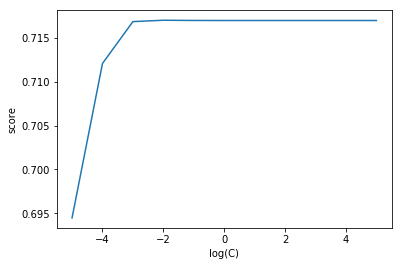

In [380]:
C, score = test_model(new_X,  y_train)

In [381]:
print(C)
print(score)

0.01
0.7170041506474837


Наилучшее значение показателя AUC-ROC достигается при C = 0.01 и равно 0.72. Это сравнимо с градиентным бустингом по 250 деревьям, при этом логистическая регрессия работает заметно быстрее.

# Построение модели с учётом "мешка слов"

In [382]:
scaler = StandardScaler()
train = pd.DataFrame(scaler.fit_transform(train), index = train.index)
test = pd.DataFrame(scaler.transform(test), index = test.index)

train = pd.concat([train, heroes_bag_train], axis=1)
test = pd.concat([test, heroes_bag_test], axis=1)

C = 1e-05
[0.69672952 0.69763965 0.6981467  0.69900522 0.70106623]
Time elapsed: 0:00:02.703893
C = 0.0001
[0.7244647  0.72424845 0.72495597 0.72738284 0.72777428]
Time elapsed: 0:00:03.616302
C = 0.001
[0.7450578  0.74651442 0.74400644 0.74958856 0.74764765]
Time elapsed: 0:00:06.602341
C = 0.01
[0.74973747 0.75256452 0.74913084 0.75602585 0.75197099]
Time elapsed: 0:00:09.624766
C = 0.1
[0.74966696 0.75292122 0.74941614 0.75657776 0.75185815]
Time elapsed: 0:00:12.688064
C = 1.0
[0.74959259 0.7529348  0.74941842 0.75661761 0.75178882]
Time elapsed: 0:00:13.546767
C = 10.0
[0.74958838 0.7529352  0.74941829 0.75662261 0.75177992]
Time elapsed: 0:00:13.456009
C = 100.0
[0.74958673 0.75293507 0.7494184  0.75662276 0.7517789 ]
Time elapsed: 0:00:13.664452
C = 1000.0
[0.74958614 0.75293605 0.74941839 0.75662251 0.75177858]
Time elapsed: 0:00:13.352317
C = 10000.0
[0.74958672 0.75293522 0.74941813 0.75662265 0.75177877]
Time elapsed: 0:00:13.641532
C = 100000.0
[0.74958675 0.75293502 0.7494

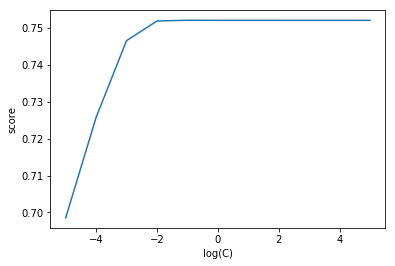

In [383]:
C, score = test_model(train,  y_train)

In [361]:
print(C)
print(score)

0.1
0.7520880446551296


После добавления "мешка слов" по героям качество заметно улучшилось. Наилучшее значение показателя AUC-ROC  достигается при C = 0.1 и равно 0.75. Это объясняется тем, что вместо отсутствия данных о героях или случайного шума из id мы имеем осмысленную разреженную матрицу для построения предсказания.